In [1]:
!python --version

Python 3.11.6


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import random
import re

In [2]:
recipes = pd.read_csv('data/recipes.csv')     

print("Data read into dataframe!")

Data read into dataframe!


In [3]:
recipes["country"].value_counts()

country
American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: count, Length: 69, dtype: int64

DATA PREPARATION


In [4]:
#To change the name of the column showing country to cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

#To convert the cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()
#Make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"




In [5]:
#To remove cuisine that appears less than 50 times in the dataframe
#To calculate the frequency of each cuisine i.e how many times each cuisine appears in the dataframe
recipes_count = recipes["cuisine"].value_counts()
cuisines_indices = recipes_count > 50    #This create a boolean series where each element corresponds to whether the corresponding cuisines appear 50 times or not
cuisines_to_keep = list(np.array(recipes_count.index.values)[np.array(cuisines_indices)]) #A list that contains all the cuisines that appear more than 50 times alone

#To convert all the yes to 1 and the no's to 0
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

recipes.head()


cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0  vietnamese       0         0      0           0      0             0   
1  vietnamese       0         0      0           0      0             0   
2  vietnamese       0         0      0           0      0             0   
3  vietnamese       0         0      0           0      0             0   
4  vietnamese       0         0      0           0      0             0   

   apricot  armagnac  artemisia  artichoke  asparagus  avocado  bacon  \
0        0         0          0          0          0        0      0   
1        0         0          0          0          0        0      0   
2        0         0          0          0          0        0      0   
3        0         0          0          0          0        0      0   
4        0         0          0          0          0        0      0   

   baked_potato  balm  banana  barley  bartlett_pear  basil  bay  bean  beech  \
0             0     0       0       0              0      1    0     0      0   
1             0     0       0       0              0      0    0     0      0   
2             0     0       0       0              0      0    0     0      0   
3             0     0       0       0              0      1    0     1      0   
4             0     0       0       0              0      0    0     0      0   

   beef  beef_broth  beef_liver  beer  beet  bell_pepper  bergamot  berry  \
0     0           0           0     0     0            0         0      0   
1     0           0           0     0     0            0         0      0   
2     0           0           0     0     0            0         0      0   
3     0           1           0     0     0            0         0      0   
4     0           0           0     0     0            0         0      0   

   bitter_orange  black_bean  black_currant  black_mustard_seed_oil  \
0              0           0              0                       0   
1              0           0              0                       0   
2              0           0              0                       0   
3              0           0              0                       0   
4              0           0              0                       0   

   black_pepper  black_raspberry  black_sesame_seed  black_tea  blackberry  \
0             0                0                  0          0           0   
1             1                0                  0          0           0   
2             0                0                  0          0           0   
3             0                0                  0          0           0   
4             0                0                  0          0           0   

   blackberry_brandy  blue_cheese  blueberry  bone_oil  bourbon_whiskey  \
0                  0            0          0         0                0   
1                  0            0          0         0                0   
2                  0            0          0         0                0   
3                  0            0          0         0                0   
4                  0            0          0         0                0   

   brandy  brassica  bread  broccoli  brown_rice  brussels_sprout  buckwheat  \
0       0         0      0         0           0                0          0   
1       0         0      0         0           0                0          0   
2       0         0      0         0           0                0          0   
3       0         0      0         0           0                0          0   
4       0         0      0         0           0                0          0   

   butter  buttermilk  cabbage  cabernet_sauvignon_wine  cacao  \
0       0           0        0                        0      0   
1       0           0        0                        0      0   
2       0           0        0                        0      0   
3       0           0        0                        0      0   
4       

In [6]:
#To sum all ingredients across all recipes
ing = recipes.iloc[:, 1:].sum(axis=0)
ingredient = pd.Series(ing.index.values, index=np.arange(len(ing)))
count = pd.Series(list(ing), index=np.arange(len(ing)))

#To create a dataframe for it
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]

# sort the dataframe in descending order
ing_df.sort_values(["count"], ascending = False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)
print(ing_df)

           ingredient  count
0                 egg  21114
1               wheat  20896
2              butter  20814
3               onion  18205
4              garlic  17465
..                ...    ...
378  lilac_flower_oil      1
379    strawberry_jam      1
380   sturgeon_caviar      1
381       kaffir_lime      1
382             beech      1

[383 rows x 2 columns]


DATE MODELLING AND EVALUATION


In [7]:
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import io
from IPython.display import Image
import pydotplus
import os
import itertools



To build a decision tree model to classify cuisines into Asian and Indian cuisines based on their ingredients

In [8]:
#Select subset of cuisines from our dataframe
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])] #This line filters the recipe dataframe to only contain rows where the cuisine is one of korean, japanese, chinese, that and india.
cuisines = asian_indian_recipes["cuisine"]   #This extract the cuisine column from the asian_indian_recipes Dataframe which will ne use as our target variable for our model.
ingredients = asian_indian_recipes.iloc[:, 1:]  #This select all columns from the second columns onward in the asian_indian_recipes Dataframe and it will be use as our features [Ingredients] in our model

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3) #This creates a edecision tree with a maximum depth of 3. Decision tree classifier is a machine learning model that can be use for classification task
bamboo_tree.fit(ingredients, cuisines)  # This trains the decsion tree classifier on the features (ingredients) and target variables(cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


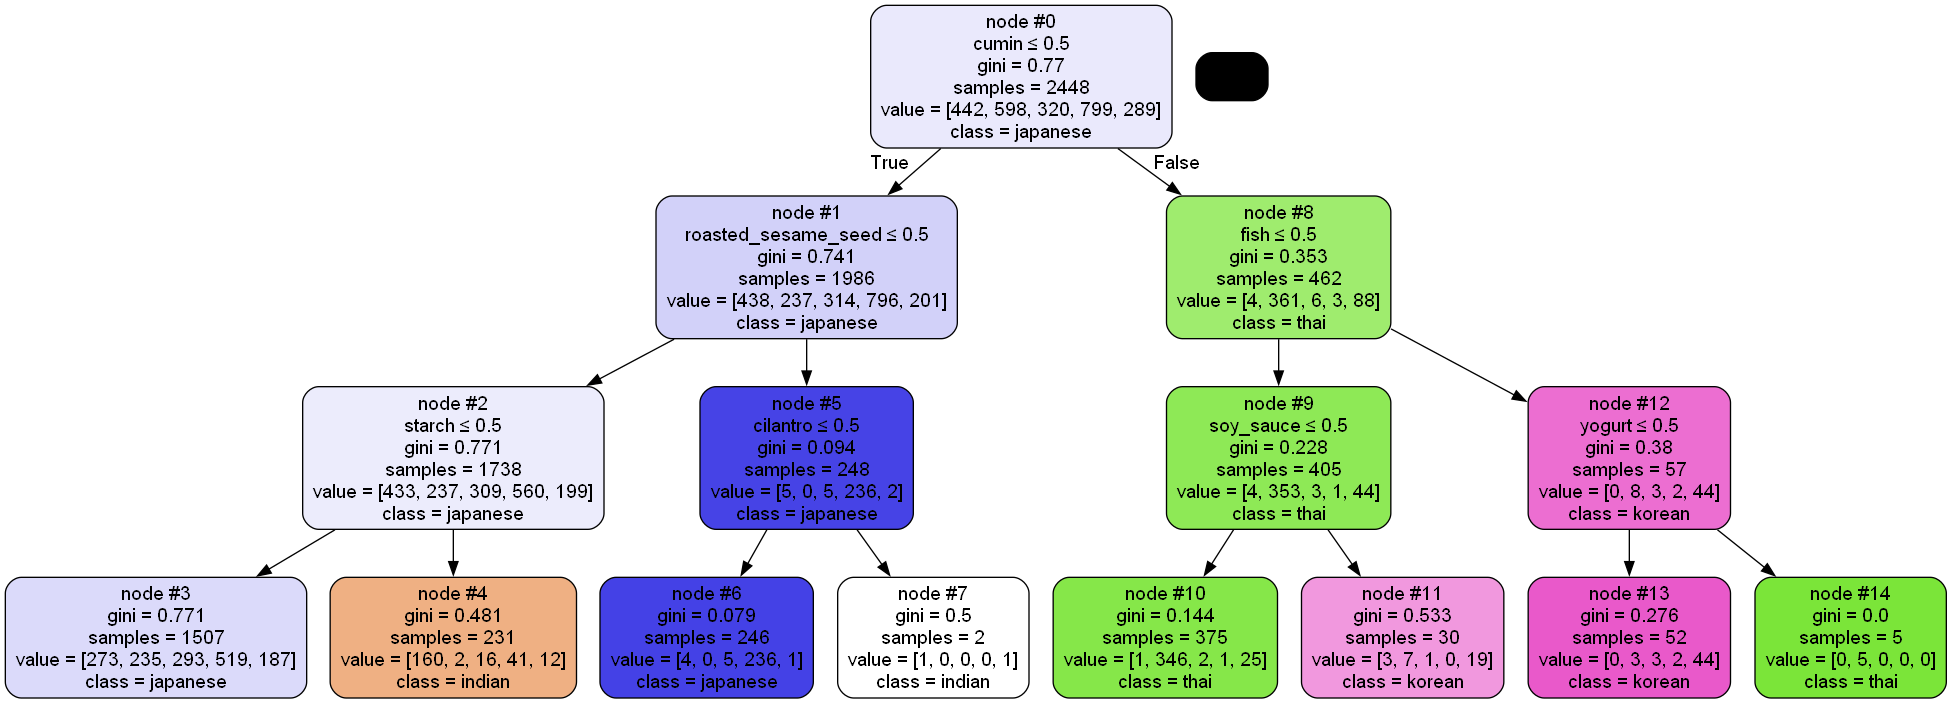

In [45]:
os.environ["PATH"] += os.pathsep + r"C:\Users\jakin\Downloads\graphviz\Graphviz\bin"
dot_data = io.StringIO()
export_graphviz(bamboo_tree, out_file=dot_data,
                filled=True, rounded=True, node_ids=True,
                special_characters=True,
                feature_names=ingredients.columns,
                class_names=cuisines.unique()
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bamboo_tree.png')
Image(graph.create_png())

MODEL EVALUATION

To evaluate our model, I will be dividing our data set into a two sets namely: Training set and Test set. Our Model will be trained using the training set and our model will be tested using the test set.

In [9]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

bamboo["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

In [10]:
#To create a dataframe containing 30 recipes from each cuisine, selected randomly.
Sample_number = 30
random.seed(1234)  # This set a random seed which ensures that if i run this code multiple times, i will always get the same random result.

bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x:x.sample(Sample_number))
bamboo_test_ingredients = bamboo_test.iloc[:, 1:]
bamboo_test_cuisines = bamboo_test["cuisine"]

bamboo_test["cuisine"].value_counts()

cuisine
chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: count, dtype: int64

In [11]:
#To create a training set by removing the test set from the bamboo dataset and we are going to call it bamboo_train
bamboo_test_index = bamboo.index.isin(bamboo_test.index)  # This creates a boolean index which is True for rows that are in the test set (bamboo_test) and false for rows that are not in it.
bamboo_train = bamboo[~bamboo_test_index]  #This uses the negate (~) operator to flip the boolean values in bamboo_test_index such that the True's become False and the False's become True and all the rows from bamboo where the negated condition is True is selected into bamboo_train dataframe

bamboo_train_ingredients = bamboo_train.iloc[:,1:]  
bamboo_train_cuisines = bamboo_train["cuisine"]

bamboo_train["cuisine"].value_counts()


cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

In [12]:
#To build my decision tree using the training set data
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree")

Decision tree model saved to bamboo_train_tree


In [50]:
os.environ["PATH"] += os.pathsep + r"C:\Users\jakin\Downloads\graphviz\Graphviz\bin"
dot_data_train = io.StringIO()
export_graphviz(bamboo_train_tree, out_file=dot_data_train,
                filled=True, rounded=True, node_ids=True,
                special_characters=True,
                feature_names=bamboo_train_ingredients.columns,
                class_names=bamboo_train_cuisines.unique()
)
graph = pydotplus.graph_from_dot_data(dot_data_train.getvalue())
graph.write_png('bamboo_Train_tree.png')
Image(graph.create_png())

In [13]:
#To use the trained decision model on our test data by making some predictions on out bamboo_test_ingredients(features)
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)


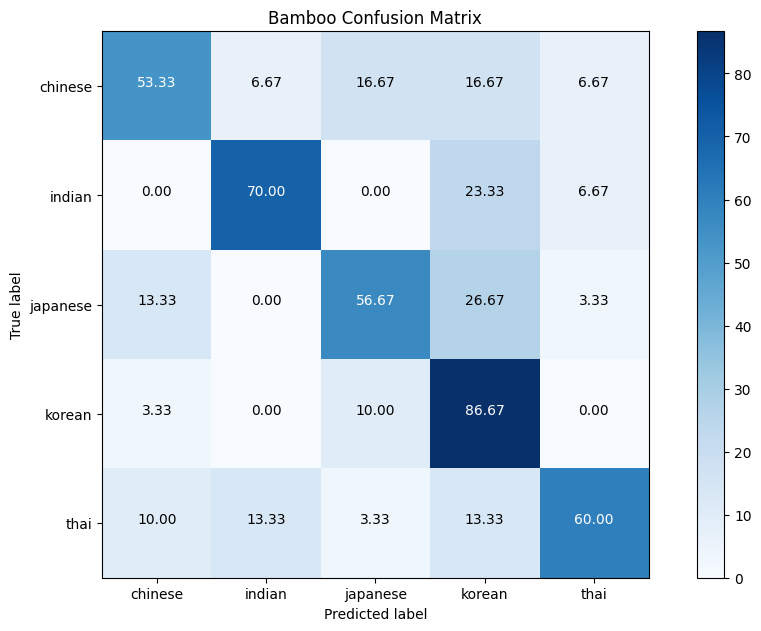

In [15]:
#To create a confusion matrix which helps to quantify how well the decision tree is able to determine the cuisine of each recipe correctly i.e it present a nice summary on how many recipes from each cuisines are correctly classified.
test_cuisines = np.unique(bamboo_test_cuisines)  #To find the unique values(classes) in my test set
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)  #To create a confusion matrix for how well the decision tree is able to correctly classify the recipesnin the bamboo_box
cmap = plt.cm.Blues     #To set the colormap that will be use for the plotting

plt.figure(figsize=(10, 6))  #This line set the dimension of the figure i.e the dimension of an empty plot to display our visual elements.
bamboo_confusion_matrix = (    #To normalize the confusion matrix.
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)   #To display the image on the plot
plt.colorbar()   #To add a color bar on the right side of the plot.
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

#To place text annotations on our heat map which is the visual representation of the confusion matrix.
fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Bamboo Confusion Matrix')

plt.show()